In [ ]:
import numpy as np

In [ ]:
pip install tensorflow==2.13.1

In [ ]:
from scipy import optimize
import tensorflow as tf
print(tf.__version__)

In [ ]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype=('i8','U6','f8'))

day = []
time = []
height = []

for i in range(len(data)):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])

#print(day)
#print(time)
#print(height)

timehour = []
timemin = []
timehourdec = []
timemindec = []
timepercent = []
x = []
for i in range(len(time)):
    splittime = time[i].split(':')
    timehour.append(splittime[0])
    timehourdec.append(float(splittime[0])/24)
    timemin.append(splittime[1])
    timemindec.append(float(splittime[1])/1440)
    timepercent.append(timehourdec[i]+timemindec[i])
    x.append(timepercent[i]+day[i])
    
print (x)

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'tide height')

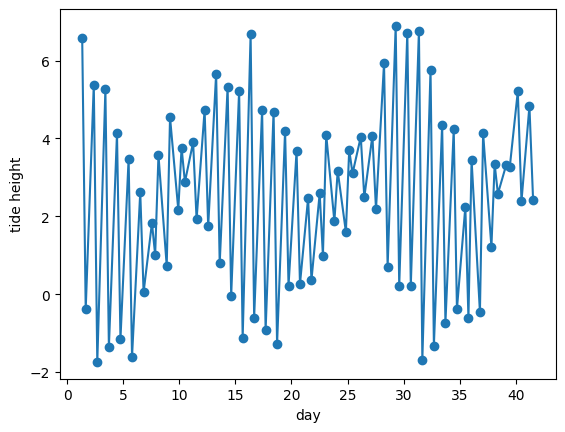

In [22]:
plt.plot(x, height, '-o')
plt.xlabel("day")
plt.ylabel("tide height") 

In [20]:
#24h - 1.0 - 1440min

#487/1440 #what to do when we find the number 

In [8]:
A_init = 2.9145562648773193
A_fit = tf.Variable(A_init)
B_init = 0.45006895065307617
B_fit = tf.Variable(B_init)
C_init = 0.2865771949291229
C_fit = tf.Variable(C_init)
D_init = 1.1557908058166504
D_fit = tf.Variable(D_init)
E_init = 30.130300521850586
E_fit = tf.Variable(E_init)
F_init = -1.0028715133666992
F_fit = tf.Variable(F_init)
G_init = 2.4069228172302246
G_fit = tf.Variable(G_init)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:22'

In [ ]:
@tf.function
def model(x):
    return (A_fit * tf.math.sin(B_fit * x + C_fit) + D_fit) * tf.math.sin(E_fit * x + F_fit) + G_fit

In [ ]:
@tf.function
def mse(y_true, y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
epochs = 30000 #number of epochs to run
display_step = 1000 #number of epochs between printing info to screen

for epoch in range(epochs):
    #monitor training/display steps
    if((epoch%display_step)==0):
        pred = model(x)
        loss = mse(pred, height)

        #To print this info, we need to convert to numpy arrays
        print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()}, B: {B_fit.numpy()}, C: {C_fit.numpy()}, D: {D_fit.numpy()}, E: {E_fit.numpy()}, F: {F_fit.numpy()}, G: {G_fit.numpy()}")

    #In TF2, gradients are handled using the GradientTape class. Begin GradientTape and optimize
    with tf.GradientTape() as g:
        pred = model(x)
        loss = mse(height,pred)

    #Compute dm, db, the gradients with respect to m_fit and b_fit
    gradients = g.gradient(loss, [A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit])

    #update m_fit and b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients,[A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit]))

print(f"Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()}, B: {B_fit.numpy()}, C: {C_fit.numpy()}, D: {D_fit.numpy()}, E: {E_fit.numpy()}, F: {F_fit.numpy()}, G: {G_fit.numpy()}")
print("Done!")

In [ ]:
def model_fit(x, a, b, c, d, e, f, g):
    return (a * np.sin(b*np.array(x) + c) + d) * np.sin(e*np.array(x) + f) + g
#def model_fit(x, a, b, c, d):
    #return a*np.sin(b*np.array(x) + c) + d

y_fit = model_fit(x,A_fit,B_fit,C_fit,D_fit,E_fit,F_fit,G_fit)
#y_fit = model_fit(x, 1.5, 0.5, 0.3, 2.2, 25.0, 1.0, 2.5)
#y_fit = model_fit(x, -1.8, 0.41, 0.6, 3.3, 30.0, 1.5, 0.3)

In [ ]:
f = plt.figure(figsize=(7,7))
plt.plot(x,height,'-o',label="data")
plt.plot(x,y_fit,label="fit")
plt.xlabel('Time (days)')
plt.ylabel('Tide Height (ft.)')
plt.legend(loc=0,frameon=False)

In [ ]:
#4
#actual height - observed height(the model)

residual = height - y_fit

#covariance = curve_fit(model_fit, x, height)

#standard deviation

std_dev = np.std(x)

print("Standard Deviation", std_dev)

In [ ]:
#new height values

height2 = height
hight2[26] = height2[26]+2

residual = height2 - y_fit

std_dev = np.std(x)

print("Standard Deviation", std_dev)

#how many std
residual/ np.std(x) = {"How many std away from 0", }

#more than 3 significant outlier less than not significant
